### PASCAL VOC 2007 데이터 세트 다운로드

In [1]:
!pip install gdown

In [2]:
# !wget http://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
# https://drive.google.com/file/d/1OIUjngjw_sj2s4pDYJljznwJKTI7Y14a/view?usp=sharing
!gdown https://drive.google.com/uc?id=1OIUjngjw_sj2s4pDYJljznwJKTI7Y14a
!tar -xvf VOCtrainval_06-Nov-2007.tar > /dev/null 2>&1

Downloading...
From (original): https://drive.google.com/uc?id=1OIUjngjw_sj2s4pDYJljznwJKTI7Y14a
From (redirected): https://drive.google.com/uc?id=1OIUjngjw_sj2s4pDYJljznwJKTI7Y14a&confirm=t&uuid=f1155147-d2eb-445a-b2f0-dfb74c3c3942
To: /content/VOCtrainval_06-Nov-2007.tar
100%|████████████████████████████████████████| 460M/460M [00:10<00:00, 42.7MB/s]


### MMDetection은 Mask RCNN을 학습하기 위해서는 COCO 포맷을 가장 선호
* CocoDataset으로 지정해야만, evaluation 시 mask evaluation 정보 제공.(2021년 6월 기준) https://mmdetection.readthedocs.io/en/latest/tutorials/customize_dataset.html
* Pascal voc 포맷을 Coco 포맷으로 변환할 수 있는 유틸리티를 활용하여 데이터 변환
https://github.com/ISSResearch/Dataset-Converters
* Dataset converter 패키지가 opencv를 3.4로 downgrade함에 유의

In [3]:
import cv2
import numpy as np
print(cv2.__version__)
print(np.__version__)

4.12.0
1.23.0


In [4]:
!git clone https://github.com/ISSResearch/Dataset-Converters.git


Cloning into 'Dataset-Converters'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 54 (delta 3), reused 10 (delta 2), pack-reused 39 (from 1)
Unpacking objects: 100% (54/54), done.


In [5]:
!cd Dataset-Converters; pip install -r requirements.txt

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 MB 169.9 MB/s  0:00:00 eta 0:00:01
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26397 sha256=365af8956f7efa2f1d24bb23b99f3b816a701e77adcba2bb52fb7fae4236f9e2
  Stored in directory: /root/.cache/pip/wheels/fa/17/1f/332799f975d1b2d7f9b3f33bbccf65031e794717d24432caee
Successfully built typing
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.12.0.88
    Uninstalling opencv-python-4.12.0.88:
      Successfully uninstalled opencv-python-4.12.0.88
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9/9 [cityscapesscripts]cityscapesscripts]


In [6]:
!mkdir /content/coco_output
!cd Dataset-Converters;python convert.py --input-folder /content/VOCdevkit/VOC2007 --output-folder /content/coco_output \
                  --input-format VOCSEGM --output-format COCO --copy

In [7]:
!pip install opencv-python==4.1.2.30

ERROR: Ignored the following yanked versions: 3.4.11.39, 3.4.17.61, 4.4.0.42, 4.4.0.44, 4.5.4.58, 4.5.5.62, 4.7.0.68
ERROR: Could not find a version that satisfies the requirement opencv-python==4.1.2.30 (from versions: 3.4.0.14, 3.4.10.37, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.14.51, 3.4.14.53, 3.4.15.55, 3.4.16.57, 3.4.16.59, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.46, 4.5.1.48, 4.5.2.52, 4.5.2.54, 4.5.3.56, 4.5.4.60, 4.5.5.64, 4.6.0.66, 4.7.0.72, 4.8.0.74, 4.8.0.76, 4.8.1.78, 4.9.0.80, 4.10.0.82, 4.10.0.84, 4.11.0.86, 4.12.0.88)
ERROR: No matching distribution found for opencv-python==4.1.2.30


### 생성된 Coco Annotation json 파일 살펴 보기

In [ ]:
!sudo apt-get install jq

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libjq1 libonig4
The following NEW packages will be installed:
  jq libjq1 libonig4
0 upgraded, 3 newly installed, 0 to remove and 20 not upgraded.
Need to get 276 kB of archives.
After this operation, 930 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libonig4 amd64 6.7.0-1 [119 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libjq1 amd64 1.5+dfsg-2 [111 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 jq amd64 1.5+dfsg-2 [45.6 kB]
Fetched 276 kB in 0s (3,259 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /

In [ ]:
!jq . /content/coco_output/annotations/train.json > output.json

In [ ]:
!head -200 output.json

{
  "images": [
    {
      "file_name": "000032.jpg",
      "height": 281,
      "width": 500,
      "id": 1
    },
    {
      "file_name": "000033.jpg",
      "height": 366,
      "width": 500,
      "id": 2
    },
    {
      "file_name": "000042.jpg",
      "height": 335,
      "width": 500,
      "id": 3
    },
    {
      "file_name": "000061.jpg",
      "height": 333,
      "width": 500,
      "id": 4
    },
    {
      "file_name": "000129.jpg",
      "height": 500,
      "width": 334,
      "id": 5
    },
    {
      "file_name": "000187.jpg",
      "height": 375,
      "width": 500,
      "id": 6
    },
    {
      "file_name": "000250.jpg",
      "height": 375,
      "width": 500,
      "id": 7
    },
    {
      "file_name": "000256.jpg",
      "height": 343,
      "width": 500,
      "id": 8
    },
    {
      "file_name": "000528.jpg",
      "height": 375,
      "width": 500,
      "id": 9
    },
    {
      "file_name": "000549.jpg",
      "height": 500,
      "width": 

In [ ]:
!tail -200 output.json

          31,
          304,
          34,
          305,
          35,
          305,
          38,
          308,
          41,
          307,
          42,
          307,
          43,
          306,
          44,
          307,
          45,
          307,
          46,
          306,
          47,
          306,
          48,
          308,
          50,
          309,
          49,
          312,
          49,
          313,
          50,
          313,
          49,
          314,
          48,
          314,
          46,
          315,
          45,
          315,
          43,
          316,
          42,
          316,
          40,
          317,
          39,
          317,
          37,
          318,
          36,
          318,
          34,
          319,
          33,
          319,
          31,
          320,
          30,
          320,
          20,
          321,
          19,
          321,
          17,
          322,
          16,
          322,
          11,


In [ ]:
!grep -n 'annotations' output.json

1259:  "annotations": [


In [ ]:
!head -1600 output.json | tail -400

      "id": 200
    },
    {
      "file_name": "009654.jpg",
      "height": 500,
      "width": 333,
      "id": 201
    },
    {
      "file_name": "009684.jpg",
      "height": 375,
      "width": 500,
      "id": 202
    },
    {
      "file_name": "009691.jpg",
      "height": 333,
      "width": 500,
      "id": 203
    },
    {
      "file_name": "009709.jpg",
      "height": 500,
      "width": 375,
      "id": 204
    },
    {
      "file_name": "009756.jpg",
      "height": 375,
      "width": 500,
      "id": 205
    },
    {
      "file_name": "009807.jpg",
      "height": 333,
      "width": 500,
      "id": 206
    },
    {
      "file_name": "009832.jpg",
      "height": 375,
      "width": 500,
      "id": 207
    },
    {
      "file_name": "009911.jpg",
      "height": 400,
      "width": 500,
      "id": 208
    },
    {
      "file_name": "009938.jpg",
      "height": 375,
      "width": 500,
      "id": 209
    }
  ],
  "type": "instances",
  "annotations": [
    

### Pretrained 모델 다운로드 및 Config, Dataset설정.

In [8]:
# pretrained weight 모델을 다운로드 받기 위해서 mmdetection/checkpoints 디렉토리를 만듬.
!cd mmdetection; mkdir checkpoints

In [9]:
!wget -O /content/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth http://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r101_fpn_1x_coco/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth

--2025-12-21 10:15:48--  http://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r101_fpn_1x_coco/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.246.22.198, 47.246.22.196, 47.246.22.194, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|47.246.22.198|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 254089599 (242M) [application/octet-stream]
Saving to: ‘/content/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth’

/content/mmdetectio 100%[===================>] 242.32M  41.3MB/s    in 6.0s    

2025-12-21 10:15:54 (40.3 MB/s) - ‘/content/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth’ saved [254089599/254089599]



In [10]:
!ls -lia /content/mmdetection/checkpoints

total 248136
 4295170243 drwxr-xr-x 2 root root        70 Dec 21 10:15 .
15578837327 drwxrwxrwx 1 root root        33 Dec 21 10:15 ..
 4295170244 -rw-r--r-- 1 root root 254089599 Nov  2  2021 mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth


In [11]:
# config 파일을 설정하고, 다운로드 받은 pretrained 모델을 checkpoint로 설정.
config_file = '/content/mmdetection/configs/mask_rcnn/mask_rcnn_r101_fpn_1x_coco.py'
checkpoint_file = '/content/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth'

In [12]:
from mmdet.datasets.builder import DATASETS
from mmdet.datasets.coco import CocoDataset

@DATASETS.register_module(force=True)
class VOCDataset(CocoDataset):
  CLASSES = ('aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car',
               'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse',
               'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train',
               'tvmonitor')

/opt/conda/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/conda/lib/python3.9/site-packages/torch/utils/cpp_extension.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import packaging  # type: ignore[attr-defined]
/opt/conda/lib/python3.9/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/comp

In [13]:
from mmcv import Config

cfg = Config.fromfile(config_file)
print(cfg.pretty_text)

model = dict(
    type='MaskRCNN',
    backbone=dict(
        type='ResNet',
        depth=101,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained',
                      checkpoint='torchvision://resnet101')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoi

In [14]:
from mmdet.apis import set_random_seed

# dataset에 대한 환경 파라미터 수정.
cfg.dataset_type = 'VOCDataset'
cfg.data_root = '/content/coco_output/'

# train, val, test dataset에 대한 type, data_root, ann_file, img_prefix 환경 파라미터 수정.
cfg.data.train.type = 'VOCDataset'
cfg.data.train.data_root = '/content/coco_output/'
cfg.data.train.ann_file = 'annotations/train.json'
cfg.data.train.img_prefix = 'train'

cfg.data.val.type = 'VOCDataset'
cfg.data.val.data_root = '/content/coco_output/'
cfg.data.val.ann_file = 'annotations/val.json'
cfg.data.val.img_prefix = 'val'


# class의 갯수를 pascal voc로 설정.  수정.
cfg.model.roi_head.bbox_head.num_classes = 20
cfg.model.roi_head.mask_head.num_classes = 20

# pretrained 모델
cfg.load_from = '/content/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth'

# 학습 weight 파일로 로그를 저장하기 위한 디렉토리 설정.
cfg.work_dir = './tutorial_exps'

# 학습율 변경 환경 파라미터 설정.
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# CocoDataset의 경우 metric을 bbox로 설정해야 함.(mAP아님. bbox로 설정하면 mAP를 iou threshold를 0.5 ~ 0.95까지 변경하면서 측정)
cfg.evaluation.metric = ['bbox', 'segm']
cfg.evaluation.interval = 12
cfg.checkpoint_config.interval = 12

# 두번 config를 로드하면 lr_config의 policy가 사라지는 오류로 인하여 설정.
cfg.lr_config.policy='step'
# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# ConfigDict' object has no attribute 'device 오류 발생시 반드시 설정 필요. https://github.com/open-mmlab/mmdetection/issues/7901
cfg.device='cuda'

In [15]:
print(cfg.pretty_text)

model = dict(
    type='MaskRCNN',
    backbone=dict(
        type='ResNet',
        depth=101,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained',
                      checkpoint='torchvision://resnet101')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoi

In [16]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

# train용 Dataset 생성.
datasets = [build_dataset(cfg.data.train)]

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


In [17]:
model = build_detector(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
model.CLASSES = datasets[0].CLASSES
print(model.CLASSES)

('aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor')


In [21]:
import mmcv
import os.path as osp

mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
# epochs는 config의 runner 파라미터로 지정됨. 기본 12회
train_detector(model, datasets, cfg, distributed=False, validate=True)

2025-12-21 10:16:44,749 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.
2025-12-21 10:16:44,783 - mmdet - INFO - load checkpoint from local path: /content/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth


loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


2025-12-21 10:16:45,013 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([21, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([21]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([80, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is torch.Size([80]).
size mismatch for roi_head.mask_head.conv_logits.weight: copying a param with shape torch.Size([80, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([20, 256, 1, 1]).
size mismatch for roi_head.mask_head.conv_logits

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 213/213, 19.1 task/s, elapsed: 11s, ETA:     0s

2025-12-21 10:25:24,460 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.19s).
Accumulating evaluation results...


2025-12-21 10:25:24,798 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.520
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.799
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.607
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.247
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.524
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.592
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.613
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.613
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.613
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.305
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.615
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.13s).
Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*


/content/mmdetection/mmdet/datasets/coco.py:470: UserWarning: The key "bbox" is deleted for more accurate mask AP of small/medium/large instances since v2.12.0. This does not change the overall mAP calculation.
  warnings.warn(
2025-12-21 10:25:25,368 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.480
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.724
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.540
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.165
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.435
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.601
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.562
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.562
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.562
 Ave

DONE (t=0.26s).
Accumulating evaluation results...
DONE (t=0.13s).


### 학습된 모델을 이용하여 단일 이미지와 Video Inference 수행.

load checkpoint from local path: /content/tutorial_exps/epoch_12.pth


/content/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


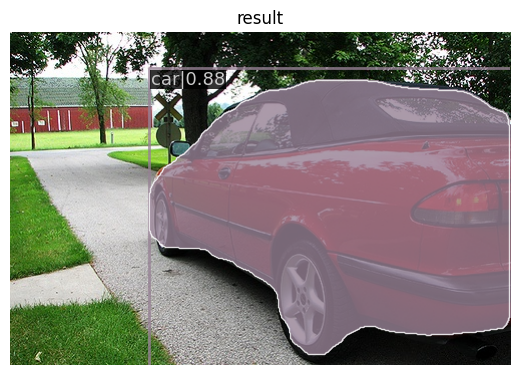

In [23]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot

checkpoint_file = '/content/tutorial_exps/epoch_12.pth'

# checkpoint 저장된 model 파일을 이용하여 모델을 생성, 이때 Config는 위에서 update된 config 사용.
model_ckpt = init_detector(cfg, checkpoint_file, device='cuda:0')
# BGR Image 사용
img = cv2.imread('/content/VOCdevkit/VOC2007/JPEGImages/000007.jpg')
#model_ckpt.cfg = cfg

result = inference_detector(model_ckpt, img)
show_result_pyplot(model_ckpt, img, result, score_thr=0.5)

In [24]:
!mkdir /content/data
!wget -O ./data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

--2025-12-21 10:26:52--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘./data/beatles01.jpg’

./data/beatles01.jp 100%[===================>] 374.14K  --.-KB/s    in 0.003s  

2025-12-21 10:26:52 (144 MB/s) - ‘./data/beatles01.jpg’ saved [383118/383118]



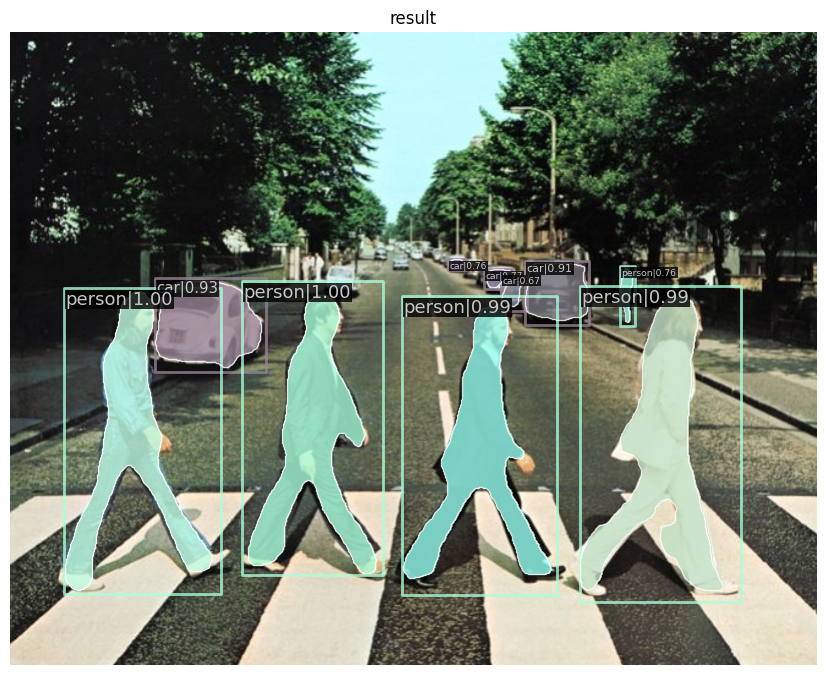

In [25]:
img = cv2.imread('/content/data/beatles01.jpg')
#model_ckpt.cfg = cfg

result = inference_detector(model_ckpt, img)
show_result_pyplot(model_ckpt, img, result, score_thr=0.5)

### Video Inference 수행
* get_detected_img()함수를 이용하여 Inference 수행.

In [26]:
!wget -O /content/data/London_Street.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/London_Street.mp4?raw=true

--2025-12-21 10:26:55--  https://github.com/chulminkw/DLCV/blob/master/data/video/London_Street.mp4?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/refs/heads/master/data/video/London_Street.mp4 [following]
--2025-12-21 10:26:55--  https://github.com/chulminkw/DLCV/raw/refs/heads/master/data/video/London_Street.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/refs/heads/master/data/video/London_Street.mp4 [following]
--2025-12-21 10:26:55--  https://raw.githubusercontent.com/chulminkw/DLCV/refs/heads/master/data/video/London_Street.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.g

In [27]:
import numpy as np

labels_to_names_seq =  {0:'aeroplane', 1:'bicycle', 2:'bird', 3:'boat', 4:'bottle', 5:'bus', 6:'car',
               7:'cat', 8:'chair', 9:'cow', 10:'diningtable', 11:'dog', 12:'horse',
               13:'motorbike', 14:'person', 15:'pottedplant', 16:'sheep', 17:'sofa', 18:'train',
               19:'tvmonitor'}

colors = list(
    [[0, 255, 0],
     [0, 0, 255],
     [255, 0, 0],
     [0, 255, 255],
     [255, 255, 0],
     [255, 0, 255],
     [80, 70, 180],
     [250, 80, 190],
     [245, 145, 50],
     [70, 150, 250]] )

In [28]:
# model과 원본 이미지 array, filtering할 기준 class confidence score를 인자로 가지는 inference 시각화용 함수 생성.
# 이미 inference 시 mask boolean값이 들어오므로 mask_threshold 값을 필요하지 않음.
def get_detected_img(model, img_array,  score_threshold=0.3, is_print=True):
  # 인자로 들어온 image_array를 복사.
  draw_img = img_array.copy()
  bbox_color=(0, 255, 0)
  text_color=(0, 0, 255)

  # model과 image array를 입력 인자로 inference detection 수행하고 결과를 results로 받음.
  # results는 80개의 2차원 array(shape=(오브젝트갯수, 5))를 가지는 list.
  results = inference_detector(model, img_array)
  bbox_results = results[0]
  seg_results = results[1]

  # 80개의 array원소를 가지는 results 리스트를 loop를 돌면서 개별 2차원 array들을 추출하고 이를 기반으로 이미지 시각화
  # results 리스트의 위치 index가 바로 COCO 매핑된 Class id. 여기서는 result_ind가 class id
  # 개별 2차원 array에 오브젝트별 좌표와 class confidence score 값을 가짐.
  for result_ind, bbox_result in enumerate(bbox_results):
    # 개별 2차원 array의 row size가 0 이면 해당 Class id로 값이 없으므로 다음 loop로 진행.
    if len(bbox_result) == 0:
      continue

    mask_array_list = seg_results[result_ind]

    # 해당 클래스 별로 Detect된 여러개의 오브젝트 정보가 2차원 array에 담겨 있으며, 이 2차원 array를 row수만큼 iteration해서 개별 오브젝트의 좌표값 추출.
    for i in range(len(bbox_result)):
      # 좌상단, 우하단 좌표 추출.
      if bbox_result[i, 4] > score_threshold:
        left = int(bbox_result[i, 0])
        top = int(bbox_result[i, 1])
        right = int(bbox_result[i, 2])
        bottom = int(bbox_result[i, 3])
        caption = "{}: {:.4f}".format(labels_to_names_seq[result_ind], bbox_result[i, 4])
        cv2.rectangle(draw_img, (left, top), (right, bottom), color=bbox_color, thickness=2)
        cv2.putText(draw_img, caption, (int(left), int(top - 7)), cv2.FONT_HERSHEY_SIMPLEX, 0.37, text_color, 1)
        # masking 시각화 적용. class_mask_array는 image 크기 shape의  True/False값을 가지는 2차원 array
        class_mask_array = mask_array_list[i]
        # 원본 image array에서 mask가 True인 영역만 별도 추출.
        masked_roi = draw_img[class_mask_array]
        #color를 임의 지정
        #color_index = np.random.randint(0, len(colors)-1)
        # color를 class별로 지정
        color_index = result_ind % len(colors)
        color = colors[color_index]
        # apply_mask()함수를 적용시 수행 시간이 상대적으로 오래 걸림.
        #draw_img = apply_mask(draw_img, class_mask_array, color, alpha=0.4)
        # 원본 이미지의 masking 될 영역에 mask를 특정 투명 컬러로 적용
        draw_img[class_mask_array] = ([0.3*color[0], 0.3*color[1], 0.3*color[2]] + 0.6 * masked_roi).astype(np.uint8)
        if is_print:
          print(caption)

  return draw_img


In [29]:
import time

def do_detected_video(model, input_path, output_path, score_threshold, do_print=True):

    cap = cv2.VideoCapture(input_path)

    codec = cv2.VideoWriter_fourcc(*'XVID')

    vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    vid_fps = cap.get(cv2.CAP_PROP_FPS)

    vid_writer = cv2.VideoWriter(output_path, codec, vid_fps, vid_size)

    frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print('총 Frame 갯수:', frame_cnt)
    btime = time.time()
    while True:
        hasFrame, img_frame = cap.read()
        if not hasFrame:
            print('더 이상 처리할 frame이 없습니다.')
            break
        stime = time.time()
        img_frame = get_detected_img(model, img_frame,  score_threshold=score_threshold,is_print=False)
        if do_print:
          print('frame별 detection 수행 시간:', round(time.time() - stime, 4))
        vid_writer.write(img_frame)
    # end of while loop

    vid_writer.release()
    cap.release()

    print('최종 detection 완료 수행 시간:', round(time.time() - btime, 4))

In [ ]:
do_detected_video(model_ckpt, '/content/data/London_Street.mp4', '/content/data/London_Street_out01.mp4', score_threshold=0.4, do_print=True)

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


총 Frame 갯수: 489
frame별 detection 수행 시간: 0.179
frame별 detection 수행 시간: 0.1459
frame별 detection 수행 시간: 0.1448
frame별 detection 수행 시간: 0.1455
frame별 detection 수행 시간: 0.1855
frame별 detection 수행 시간: 0.1976
frame별 detection 수행 시간: 0.199
frame별 detection 수행 시간: 0.1863
frame별 detection 수행 시간: 0.1909
frame별 detection 수행 시간: 0.1928
frame별 detection 수행 시간: 0.1827
frame별 detection 수행 시간: 0.1883
frame별 detection 수행 시간: 0.1891
frame별 detection 수행 시간: 0.1905
frame별 detection 수행 시간: 0.1922
frame별 detection 수행 시간: 0.2053
frame별 detection 수행 시간: 0.1928
frame별 detection 수행 시간: 0.1974
frame별 detection 수행 시간: 0.183
frame별 detection 수행 시간: 0.1957
frame별 detection 수행 시간: 0.1836
frame별 detection 수행 시간: 0.1918
frame별 detection 수행 시간: 0.1884
frame별 detection 수행 시간: 0.1938
frame별 detection 수행 시간: 0.1826
frame별 detection 수행 시간: 0.2176
frame별 detection 수행 시간: 0.1847
frame별 detection 수행 시간: 0.18
frame별 detection 수행 시간: 0.1863
frame별 detection 수행 시간: 0.1894
frame별 detection 수행 시간: 0.1927
frame별 detection 수행 시간: 0.19